<a href="https://colab.research.google.com/github/PEKKA2001/Ml-Project/blob/master/Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-jdfrhwhv/detectron2_77796c4c593b407abba9e6759f92eac6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-jdfrhwhv/detectron2_77796c4c593b407abba9e6759f92eac6
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done
  Using cached Pillow-9.4.0-cp39-cp39-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [ ]:
!pip install -U layoutparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install layoutparser[ocr]     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


In [8]:
!pip install fastcore -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#!pip install Pillow==4.0.0
!pip install PIL
!pip install image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import cv2
import layoutparser as lp
Image = cv2.imread("/content/layout-parser/examples/data/img1.png")
Image = Image[..., ::-1]

In [5]:
from PIL import Image


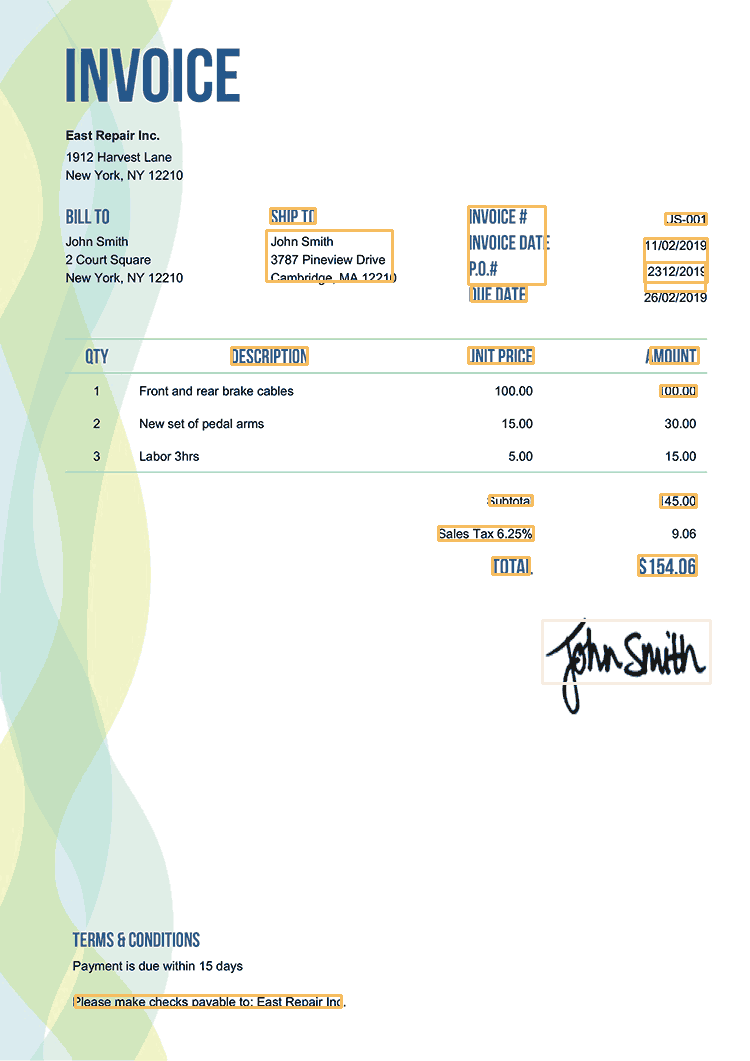

In [18]:
import layoutparser as lp
model = lp.models.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={1:"Page Frame", 2:"Row", 3:"Title Region", 4:"Text Region", 5:"Title", 6:"Subtitle", 7:"Other"})
layout = model.detect(Image) 
lp.draw_box(Image, layout)

In [19]:
#text_blocks = lp.Layout([b for b in layout if b.type=="Text"])
#text_blocks
type(layout)

layoutparser.elements.layout.Layout

In [20]:
layout[0]

TextBlock(block=Rectangle(x_1=489.27081298828125, y_1=495.58526611328125, x_2=532.7864990234375, y_2=505.85357666015625), text=None, id=None, type=Page Frame, parent=None, next=None, score=0.9999023675918579)

In [14]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])


In [21]:
#figure_blocks
text_blocks = lp.Layout([b for b in layout if b.type=='Table'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [22]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [23]:
h, w = Image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(Image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1],inplace=True)

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])
 

text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])


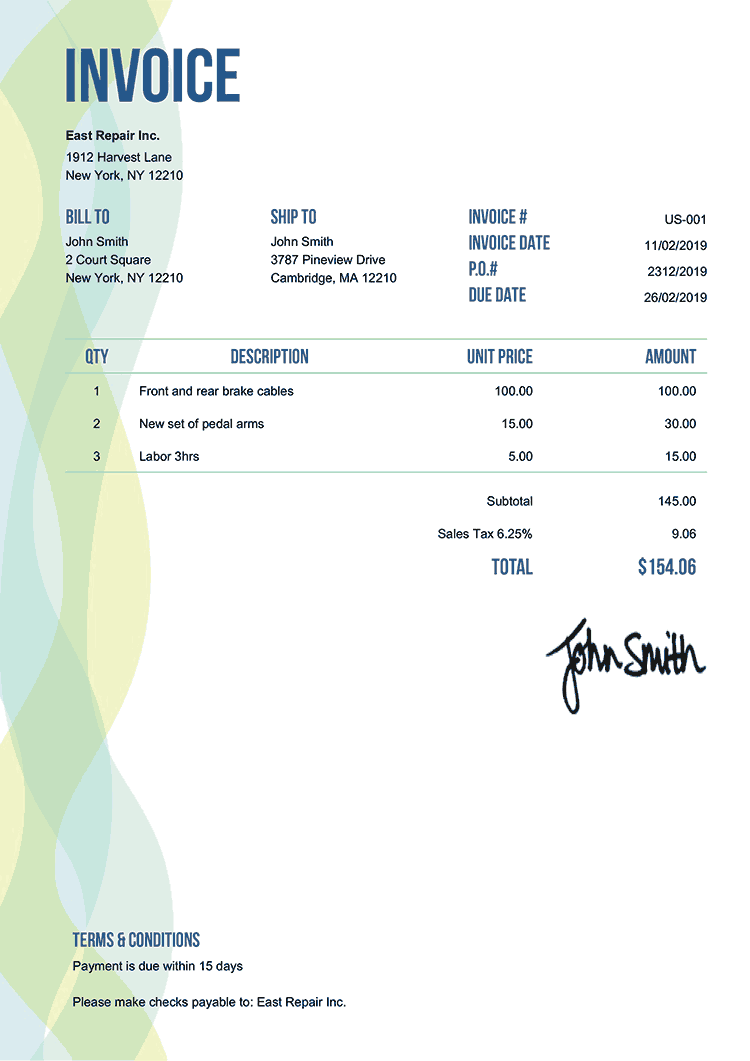

In [24]:
lp.draw_box(Image, text_blocks,
            box_width=4, 
            show_element_id=True)


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
ocr_agent = lp.TesseractAgent(languages='eng') 
 

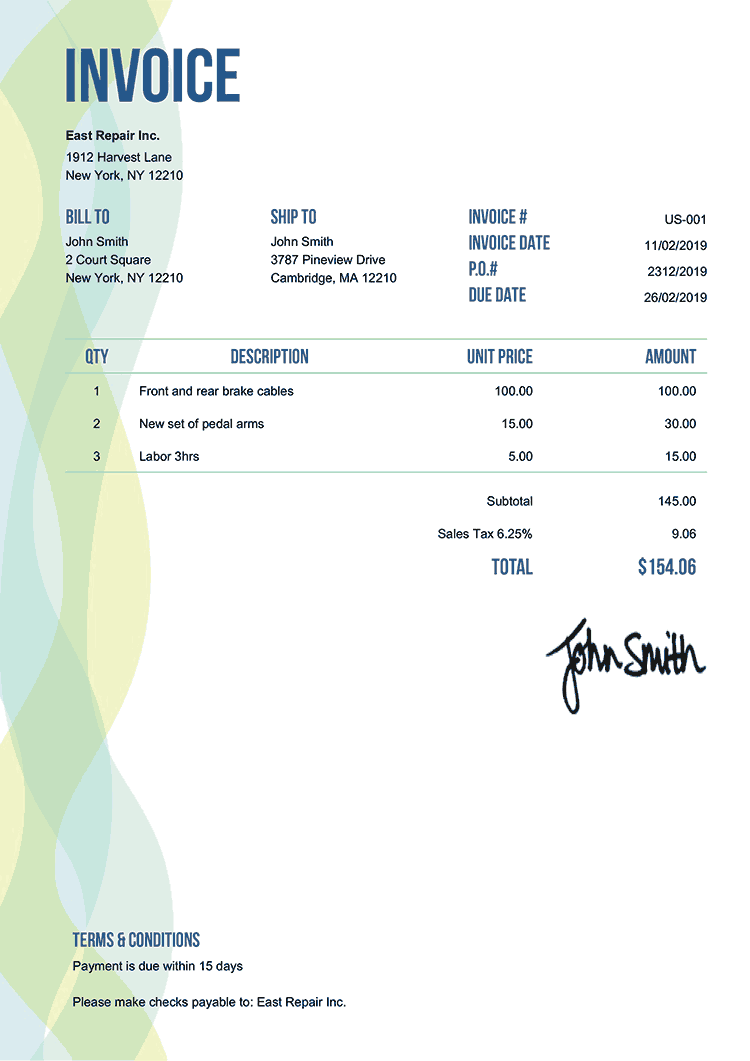

In [38]:
from PIL import Image,ImageDraw,ImageFont

Image = Image.open("/content/layout-parser/examples/data/img1.png")
Image = Image.convert("RGB")
Image

In [29]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (3,362 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [30]:
from PIL import ImageOps

In [31]:
for block in text_blocks:
    segment_image = (block.pad(left=5, right=5, top=5, bottom=5).crop_image(Image))
       
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [32]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

In [40]:
figure_blocks.get_texts()

[]

In [34]:
for block in text_blocks:
  print(block)

In [35]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

In [ ]:
!pip install click==7.1.1

In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
".".join(sentence)  

In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)